# 1) Solution of TSP for bruteforce

## Number of cities to be visited

In [1]:
n = 5

n =  5


## Matrix of distances between cities with random numbers

In [2]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    while(i<=n)
        d(i,i) = 0;
        i++;
    end

end

d = distanceMatrixCities(n)

d =

    0.00000   43.11184    4.61484   90.76704   75.43258
   50.84193    0.00000   79.64758   67.01511   37.55950
    1.09052   64.96905    0.00000   71.19517   83.14043
    2.08458   99.64595   75.99679    0.00000   70.55284
   34.55292   91.19330   57.76397   24.70533    0.00000



## Possible sequences of visited cities (e.g. 1,2,3,4,5 and 1,3,2,4,5)

In [3]:
p = perms([1:n]);

In [4]:
size(p)

ans =

   120     5



## Total travelled distance in each sequence of cities

In [5]:
function daccs = distanceCalculation(cities,d)

    daccs = zeros([size(cities)(1),size(cities)(2)+1]);

    for i = 1:(size(cities)(1))
        dacc = 0;
        
        for j = 1:(size(cities)(2)-1)
            dacc += d(cities(i,j),cities(i,j+1));
        end
        
        daccs(i,:) = [cities(i,:),dacc];
    
    end
end

In [6]:
daccs = distanceCalculation(cities = p, d = d)

daccs =

     5.0000     4.0000     3.0000     2.0000     1.0000   216.5131
     5.0000     4.0000     3.0000     1.0000     2.0000   144.9045
     5.0000     4.0000     2.0000     3.0000     1.0000   205.0894
     5.0000     4.0000     2.0000     1.0000     3.0000   179.8080
     5.0000     4.0000     1.0000     3.0000     2.0000    96.3738
     5.0000     4.0000     1.0000     2.0000     3.0000   149.5493
     5.0000     3.0000     4.0000     2.0000     1.0000   279.4470
     5.0000     3.0000     4.0000     1.0000     2.0000   174.1556
     5.0000     3.0000     2.0000     4.0000     1.0000   191.8327
     5.0000     3.0000     2.0000     1.0000     4.0000   264.3420
     5.0000     3.0000     1.0000     4.0000     2.0000   249.2675
     5.0000     3.0000     1.0000     2.0000     4.0000   168.9814
     5.0000     2.0000     4.0000     3.0000     1.0000   235.2957
     5.0000     2.0000     4.0000     1.0000     3.0000   164.9078
     5.0000     2.0000     3.0000     4.0000     1.00

## Sequence of cities with the minimum total distance (optimal solution)

### Function that returns the index of the sequence of cities with the minimim total distance

In [7]:
function minS = minimumTotalDistance(daccs,nCities)

    minD = min(daccs(:,nCities+1));
    minS = 1;

    for i = 1:size(daccs)(1)
        if(daccs(i,size(daccs)(2))==minD)
            minS = i;
        end
    end

end

In [8]:
minS = minimumTotalDistance(daccs,nCities = n)

minS =  74


In [9]:
fprintf('Sequence of cities: %s\n',sprintf('%d ', daccs(minS,1:size(daccs)(2)-1)))
fprintf('Minimum distance: %s\n',sprintf('%d ', daccs(minS,size(daccs)(2))))

Sequence of cities: 2 5 4 1 3 
Minimum distance: 68.9642 


# 2) Function that solve the TSP for any number of cities

In [10]:
function [n,minSeq,minDist,cpuTime] = TSP(nCities)

    n = nCities;
    d = distanceMatrixCities(n);
    t=cputime;

    p = perms([1:n]);

    daccs = distanceCalculation(cities = p, d = d);

    minS = minimumTotalDistance(daccs,nCities = nCities)

    minSeq = daccs(minS,1:(size(daccs)(2)-1));
    minDist = daccs(minS,size(daccs)(2));
    cpuTime = cputime-t;


end

## Function to print results

In [11]:
function printResults(n,minSeq,minDist,cpuTime)

    fprintf('Number of cities: %s\n',sprintf('%d ',n))
    fprintf('Sequence of cities: %s\n',sprintf('%d ',minSeq))
    fprintf('Minimum distance: %s\n',sprintf('%d ', minDist))
    printf('Total cpu time: %f seconds\n', cpuTime)

end

## Executing our algorithm to solve the TSP for 4,5,6,7 and 8 cities

### 4 Cities

In [12]:
[a1,a2,a3,a4] = TSP(nCities = 4); printResults(a1,a2,a3,a4)

minS =  17
Number of cities: 4 
Sequence of cities: 2 1 4 3 
Minimum distance: 61.5821 
Total cpu time: 0.005321 seconds


### 5 Cities

In [13]:
[a1,a2,a3,a4] = TSP(nCities = 5); printResults(a1,a2,a3,a4)

minS =  36
Number of cities: 5 
Sequence of cities: 4 3 1 2 5 
Minimum distance: 48.1142 
Total cpu time: 0.034815 seconds


### 6 Cities

In [14]:
[a1,a2,a3,a4] = TSP(nCities = 6); printResults(a1,a2,a3,a4)

minS =  418
Number of cities: 6 
Sequence of cities: 3 4 5 2 1 6 
Minimum distance: 63.2349 
Total cpu time: 0.224787 seconds


### 7 Cities

In [15]:
[a1,a2,a3,a4] = TSP(nCities = 7); printResults(a1,a2,a3,a4)

minS =  4911
Number of cities: 7 
Sequence of cities: 1 3 2 5 6 7 4 
Minimum distance: 64.0281 
Total cpu time: 1.257286 seconds


### 8 Cities

In [16]:
[a1,a2,a3,a4] = TSP(nCities = 8); printResults(a1,a2,a3,a4)

minS =  39969
Number of cities: 8 
Sequence of cities: 1 2 5 8 6 4 7 3 
Minimum distance: 105.967 
Total cpu time: 10.893293 seconds


## Visualization of the growth of computational time as the number of cities increase

In [17]:
function CPUTimeAndCities = plotNCitiesCPUTime(minNCities,maxNCities)

    CPUTimeAndCities = zeros(maxNCities-minNCities+1,2);

    count = 1;
        
    for i = minNCities:maxNCities;

        [nCities,minSeq,minDist,cpuTime] = TSP(nCities = i);
        CPUTimeAndCities(count,1) = nCities;
        CPUTimeAndCities(count,2) = cpuTime;
        count++;

    end

end

In [18]:
CPUTimeAndCities28 = plotNCitiesCPUTime(minNCities=2,maxNCities=8)

minS =  2
minS =  4
minS =  10
minS =  41
minS =  138
minS =  2771
minS =  31290
CPUTimeAndCities28 =

    2.0000000    0.0016250
    3.0000000    0.0031740
    4.0000000    0.0073260
    5.0000000    0.0338140
    6.0000000    0.1595690
    7.0000000    1.1476430
    8.0000000   10.4086610



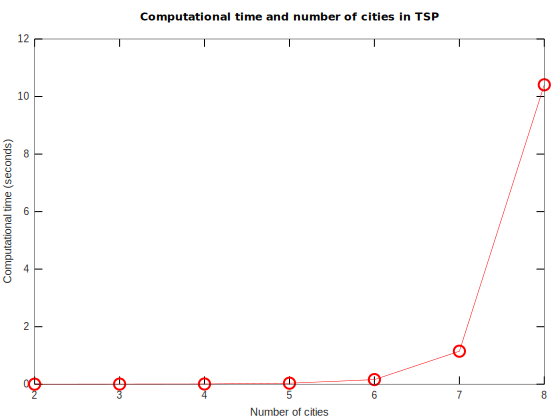

In [19]:
plot([CPUTimeAndCities28(:,1)], [CPUTimeAndCities28(:,2)], 'o-r');
title ("Computational time and number of cities in TSP");
xlabel ("Number of cities");
ylabel ("Computational time (seconds)");